In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [1]:
# verifying CSV file location

In [34]:
df = pd.read_csv('', index_col=0)

In [35]:
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_COMP0,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,0,...,0,0,1,0,0,1,0,0,0,0


In [18]:
# X not including target, companyId and all encoded columns
X = df.drop(['jobId', 'companyId', 'salary', 'jobType', 'degree', 'major', 
                    'industry'], axis=1)
# salary is the target
y = df['salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# Standardize X_train and X_test to transform yearsExperience and milesFromMetropolis to the same scale
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [24]:
lr = LinearRegression(n_jobs=2)
lr = lr.fit(X_train_ss, y_train)
print('Linear Regression Model R2 = {:.3} +/- {:.3} std ='.format(cross_val_score(lr, 
                                                                                X_test_ss, y_test, 
                                                                                cv = 10).mean(),
                                                               (cross_val_score(lr, X_test_ss, y_test, 
                                                                                cv = 10).std())))

Linear Regression Model R2 = 0.744 +/- 0.00156 std =


In [45]:
# This is a very poor RMSE 
y_pred = lr.predict(X_test_ss)
lr_rmse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 355007116637.0524


In [25]:
features = pd.Series(X_train.columns.tolist())
coef = pd.Series(lr.coef_)

fi = pd.concat([features, coef], axis=1, keys=['feature', 'beta']).set_index('feature')

fi = fi.sort_values(by='beta', ascending=False)

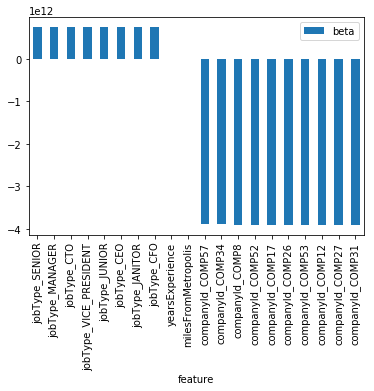

In [60]:
# Results are difficult to interpret and due to the terrible RMSE going to drop some features
fi[:20].plot(kind='bar')

In [87]:
ten_features = fi[:10].index.tolist()

## Modeling only with years experence and miles from metropolis

In [109]:
df.head(8)

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_COMP0,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,0,...,0,0,1,0,0,1,0,0,0,0
5,JOB1362684407692,113,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,0,...,0,0,0,0,0,1,0,0,0,0
6,JOB1362684407693,178,COMP15,CFO,NONE,NONE,HEALTH,23,24,0,...,0,1,0,0,0,0,1,0,0,0
7,JOB1362684407694,73,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
X = df[df.columns.tolist()[:9][7:]]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [89]:
lr2 = LinearRegression()
lr2 = lr2.fit(X_train_ss, y_train)
print('Linear Regression Model R2 = {:.3} +/- {:.3} std'.format(cross_val_score(lr2, 
                                                                                X_test_ss, y_test, 
                                                                                cv = 10).mean(),
                                                               (cross_val_score(lr2, X_test_ss, y_test, 
                                                                                cv = 10).std())))

Linear Regression Model R2 = 0.586 +/- 0.00225 std


In [79]:
# A much better RMSE, with r-squared fo 0.59
y_pred = lr2.predict(X_test_ss)
lr_rmse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 34.0568


In [81]:
# Train RMSE is slightly better than test which shows that it is not overfitting
pred_train = lr2.predict(X_train_ss)
lr_rmse = mean_squared_error(y_train, pred_train)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 33.9545


## Modeling with top 10 features (reducing bias)

In [91]:
X = df[ten_features]
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [92]:
lr3 = LinearRegression()
lr3 = lr2.fit(X_train_ss, y_train)
print('Linear Regression Model R2 = {:.3} +/- {:.3} std'.format(cross_val_score(lr3, 
                                                                                X_test_ss, y_test, 
                                                                                cv = 10).mean(),
                                                               (cross_val_score(lr3, X_test_ss, y_test, 
                                                                                cv = 10).std())))

Linear Regression Model R2 = 0.586 +/- 0.00225 std


In [93]:
# Again have very high RMSE similar to initial model
y_pred = lr3.predict(X_test_ss)
lr_rmse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 60708155925.5922


In [95]:
# Train RMSE is slightly better than test which shows that it is not overfitting
pred_train = lr3.predict(X_train_ss)
lr_rmse = mean_squared_error(y_train, pred_train)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression Train RMSE: %.4f' % lr_rmse)

Linear Regression Train RMSE: 24.9060


## Only Standardizing Years Exp and Dist. from Metropolis

In [105]:
x_standardize = df.columns.tolist()[7:9]
ss = StandardScaler()
X_standardized =ss.fit_transform(df[x_standardize])

In [110]:
x_std = pd.DataFrame(X_standardized, columns=['yrsExperienc_ss', 'disFromMetropolis_ss'])

In [112]:
df_ss = pd.concat([df, x_std], axis=1)

In [115]:
df_ss.columns[:10]

Index(['jobId', 'salary', 'companyId', 'jobType', 'degree', 'major',
       'industry', 'yearsExperience', 'milesFromMetropolis',
       'companyId_COMP0'],
      dtype='object')

In [124]:
X = df_ss.copy().drop(['jobId', 'salary', 'companyId', 'jobType', 'degree', 'major',
                   'industry', 'yearsExperience', 'milesFromMetropolis'], 
                  axis=1)
y = df_ss['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [125]:
lr4 = LinearRegression()
lr4 = lr4.fit(X_train, y_train)
print('Linear Regression Model R2 = {:.3} +/- {:.3} std'.format(cross_val_score(lr4, 
                                                                                X_test, y_test, 
                                                                                cv = 10).mean(),
                                                               (cross_val_score(lr4, X_test, y_test, 
                                                                                cv = 10).std())))

Linear Regression Model R2 = 0.745 +/- 0.00153 std


In [126]:
# Test RMSE is lower than train and relative to the range of salaries 0 - 300 (thousand) this is a good value
y_pred = lr4.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 19.5982


In [127]:
# Train rmse should be better that test and it is so feel comfortable with the results
y_pred = lr4.predict(X_train)
lr_rmse = mean_squared_error(y_train, y_pred)
lr_rmse = np.sqrt(lr_rmse)
print('Linear Regression Train RMSE: %.4f' % lr_rmse)

Linear Regression Train RMSE: 19.6118


In [128]:
features = pd.Series(X_train.columns.tolist())
coef = pd.Series(lr4.coef_)

fi = pd.concat([features, coef], axis=1, keys=['feature', 'beta']).set_index('feature')

fi = fi.sort_values(by='beta', ascending=False)

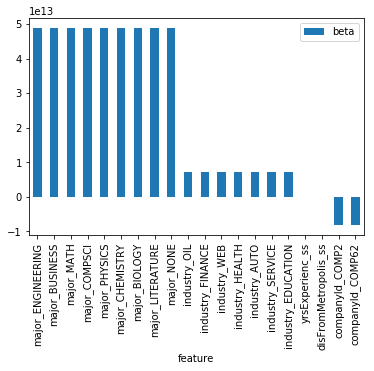

In [129]:
# 'major' categorie all have same importance then 'industry' all have the same importance
# results are not easy to interpret with this information
fi[:20].plot(kind='bar')

plt.show()